In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import scale
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.externals.six import StringIO  
from sklearn.tree import plot_tree

xls = pd.ExcelFile("feature_sheet.xls")
patient_dataframe = xls.parse('Sheet1', index_col = None, na_values= ['NA'])
colours_palette = {1:"red", 0: "blue"}
yTrain = patient_dataframe['DISEASE']

colours = [colours_palette[c] for c in yTrain]
patient_dataframe = patient_dataframe.drop('DISEASE', 1)
patient_dataframe = patient_dataframe.drop('T2 QUAL', 1)
prod_df = pd.DataFrame(list(zip(patient_dataframe['T2'].tolist(),
                                patient_dataframe['T2/MUSC'].tolist(),
                                patient_dataframe['T2/TON'].tolist(),
                                patient_dataframe['ADC'])),
                                columns=['T2', 'T2/MUSC','T2/TON', 'ADC'])

XTrain = prod_df.to_numpy()
crossValidation = StratifiedKFold(n_splits = 5)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=5) 

def TrainTree(XTrain, yTrain, sLabel) : 
    fprs=[]
    tprs=[]
    roc_auc_scores=[]
    for i, (train, test) in enumerate(crossValidation.split(XTrain,yTrain)):
        sampleX, testX = XTrain[train], XTrain[test]
        sampleY, testY = yTrain[train], yTrain[test]
        clf_entropy.fit(sampleX, sampleY)
        yPredicProb = clf_entropy.predict_proba(testX)
        yPlotScore = yPredicProb[:,1]
        fpr, tpr, thresholds = roc_curve(testY, yPlotScore, drop_intermediate=False)
        auc_score = roc_auc_score(testY, yPlotScore)
        fprs.append(fpr)
        tprs.append(tpr)
        roc_auc_scores.append(auc_score)
    print (fprs)
    print (tprs)
    print (roc_auc_scores)
    # plt.plot(mean_fpr, mean_tpr, label= sLabel +'(area = %0.2f)' % np.mean(roc_auc_scores))
    # plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver Operating Characteristic (ROC) Curve')
    # plt.legend()
    #plt.show()

TrainTree(XTrain, yTrain, 'ROC curve T2 + T2/MUSC + T2/TON + ADC')

[array([0. , 0. , 0.5, 1. ]), array([0. , 0.5, 1. ]), array([0., 1., 1.]), array([0.        , 0.33333333, 0.66666667, 1.        ]), array([0.        , 0.33333333, 0.33333333, 1.        ])]
[array([0.        , 0.55555556, 0.66666667, 1.        ]), array([0.        , 0.77777778, 1.        ]), array([0.        , 0.55555556, 1.        ]), array([0.   , 0.875, 0.875, 1.   ]), array([0.  , 0.5 , 0.75, 1.  ])]
[0.7222222222222222, 0.6388888888888888, 0.2777777777777778, 0.75, 0.6666666666666667]


In [24]:
XTrain

array([[4.63000000e+02, 3.08666667e+00, 2.80606061e+00, 1.31700000e+03],
       [1.75000000e+02, 9.45945946e-01, 1.21527778e+00, 1.19300000e+03],
       [4.71000000e+02, 2.00425532e+00, 3.27083333e+00, 1.08700000e+03],
       [3.58000000e+02, 2.57553957e+00, 1.71291866e+00, 1.66600000e+03],
       [4.24000000e+02, 2.34254144e+00, 1.30061350e+00, 1.24100000e+03],
       [4.19000000e+02, 1.85398230e+00, 3.61206897e+00, 1.22000000e+03],
       [3.89000000e+02, 2.24855491e+00, 2.47770701e+00, 1.03500000e+03],
       [4.29000000e+02, 2.63190184e+00, 1.95000000e+00, 1.76100000e+03],
       [5.67000000e+02, 2.98421053e+00, 3.00000000e+00, 1.05200000e+03],
       [4.58000000e+02, 2.77575758e+00, 2.20192308e+00, 1.14300000e+03],
       [5.28000000e+02, 4.15748031e+00, 2.03861004e+00, 8.23000000e+02],
       [5.31000000e+02, 4.08461538e+00, 4.21428571e+00, 1.10200000e+03],
       [5.06000000e+02, 2.78021978e+00, 2.00793651e+00, 9.02000000e+02],
       [6.56000000e+02, 3.39896373e+00, 5.51260504e

In [23]:
XTrainNoT2 = XTrain[:,1:4 ]
XTrainNoT2
#XTrain
#TrainTree(XTrainNoT2, yTrain, 'ROC curve T2/MUSC + T2/TON + ADC')


array([[3.08666667e+00, 2.80606061e+00, 1.31700000e+03],
       [9.45945946e-01, 1.21527778e+00, 1.19300000e+03],
       [2.00425532e+00, 3.27083333e+00, 1.08700000e+03],
       [2.57553957e+00, 1.71291866e+00, 1.66600000e+03],
       [2.34254144e+00, 1.30061350e+00, 1.24100000e+03],
       [1.85398230e+00, 3.61206897e+00, 1.22000000e+03],
       [2.24855491e+00, 2.47770701e+00, 1.03500000e+03],
       [2.63190184e+00, 1.95000000e+00, 1.76100000e+03],
       [2.98421053e+00, 3.00000000e+00, 1.05200000e+03],
       [2.77575758e+00, 2.20192308e+00, 1.14300000e+03],
       [4.15748031e+00, 2.03861004e+00, 8.23000000e+02],
       [4.08461538e+00, 4.21428571e+00, 1.10200000e+03],
       [2.78021978e+00, 2.00793651e+00, 9.02000000e+02],
       [3.39896373e+00, 5.51260504e+00, 5.21000000e+02],
       [1.84647303e+00, 2.18137255e+00, 1.32900000e+03],
       [1.40740741e+00, 1.00293255e+00, 1.30400000e+03],
       [2.85534591e+00, 3.91379310e+00, 1.26200000e+03],
       [3.23857868e+00, 2.57258

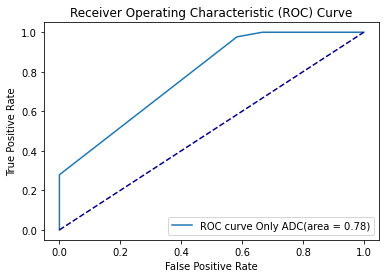

In [32]:
XTrainOnlyADC = XTrain[:,-1 ].reshape(-1,1)
XTrainOnlyADC
TrainTree(XTrainOnlyADC, yTrain, 'ROC curve Only ADC')
